
Demos - Geo - 5 Visualizations with Python to Show Simultaneous Changes in Geospatial Data - Part 2
===================================================================================================


# References
* [Notebook - Demos - Geo - Show Simultaneous Changes in Geospatial Data - Part 1](https://github.com/data-engineering-helpers/databricks-examples/blob/main/ipython-notebooks/demos-geo-show-simultaneous-changes-in-geospatial-data-1_2.ipynb)
* [Notebook - Demos - Geo - Show Simultaneous Changes in Geospatial Data - Part 2 (this notebook)](https://github.com/data-engineering-helpers/databricks-examples/blob/main/ipython-notebooks/demos-geo-show-simultaneous-changes-in-geospatial-data-2_2.ipynb)


In [0]:
%pip install geopandas contextily lxml imageio

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.3/313.3 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 80.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 8.2 MB/s eta 0:00:00
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated p

In [0]:
dbutils.library.restartPython()

In [0]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import contextily


# Copied from part 1


In [0]:
#https://geojson.xyz/
w_coast = ['Arizona', 'California', 'Idaho',
           'Montana', 'Nevada', 'New Mexico',
           'Oregon', 'Utah', 'Washington', 'Wyoming']
url = 'https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_1_states_provinces_shp.geojson'
df = gpd.read_file(url)
df = df[df.name.isin(w_coast)][['name','geometry']]   #select columns
# Before getting the centroid, the data-frame has to first be projected, here using CEA (https://proj.org/operations/projections/cea.html)
df_centroid = df.to_crs('+proj=cea').centroid
df['centroid'] = df_centroid                          #get centroids
df['lon'] = [i.xy[0][0] for i in df_centroid]         #get longitude
df['lat'] = [i.xy[1][0] for i in df_centroid]         #get latitide
df.head()

name  ...           lat
1     Montana  ...  4.645298e+06
4       Idaho  ...  4.435922e+06
5  Washington  ...  4.671604e+06
6     Arizona  ...  3.571006e+06
7  California  ...  3.830064e+06

[5 rows x 5 columns]

In [0]:
df_w = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income', 
                    match='States and territories ranked by median household income') 
df_w = df_w[0].rename(columns={'States and Washington, D.C.':'name'})
df_w = df_w.iloc[:,1:-1]
df_w.head()

name     2021     2019  ...     2012     2011     2010
0     United States  $69,717  $65,712  ...  $51,371  $50,502  $50,046
1  Washington, D.C.  $90,088  $92,266  ...  $66,583  $63,124  $60,903
2          Maryland  $90,203  $86,738  ...  $71,122  $70,004  $68,854
3     Massachusetts  $89,645  $85,843  ...  $65,339  $62,859  $62,072
4        New Jersey  $89,296  $85,751  ...  $69,667  $67,458  $67,681

[5 rows x 12 columns]

In [0]:
df_m = pd.merge(df, df_w, on='name')
df_m.head()

name  ...     2010
0     Montana  ...  $42,666
1       Idaho  ...  $43,490
2  Washington  ...  $55,631
3     Arizona  ...  $46,789
4  California  ...  $57,708

[5 rows x 16 columns]

In [0]:
y_list = [str(i) for i in list(range(2010,2022))]
y_list.remove('2020')

for i in y_list:
    df_m[str(i)+'_v'] = df_m[i].apply(lambda x: int(str(x).replace('$','').replace(',','')))
df_m.head()

name  ... 2021_v
0     Montana  ...  63249
1       Idaho  ...  66474
2  Washington  ...  84247
3     Arizona  ...  69056
4  California  ...  84907

[5 rows x 27 columns]

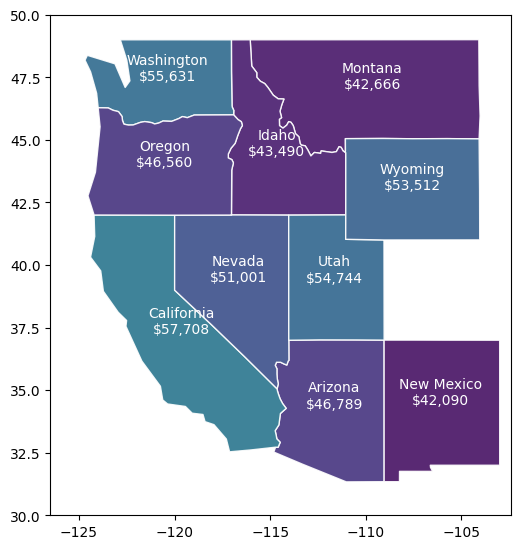

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-4483247640063382>, line 14
      9 ax.set_ylim(30, 50)
     10 df_m.apply(lambda x: ax.annotate(text = x['name'] +'\n'+ x[year],    #annotaion
     11                                  color = 'white',
     12                                  xy = x.geometry.centroid.coords[0],
     13                                  ha = 'center'), axis = 1)
---> 14 ax = contextily.add_basemap(ax, crs=df_m.crs.to_string())
     15 plt.legend(title=year, frameon=False,
     16            bbox_to_anchor=(0.05, 0.05), loc='lower left')
     17 plt.tight_layout()

NameError: name 'contextily' is not defined

In [0]:
v_list = [i+'_v' for i in y_list]
for year,val in zip(y_list, v_list):
    ax = df_m.plot(column = val,                          #plotting choropleth maps
                   edgecolor = 'white',
                   vmin = 40000, vmax = 85000, alpha=0.9,
                   figsize = (9, 6.5), cmap='viridis',
                   legend=False)
    ax.set_xlim(-126.5, -102.4)
    ax.set_ylim(30, 50)
    df_m.apply(lambda x: ax.annotate(text = x['name'] +'\n'+ x[year],    #annotaion
                                     color = 'white',
                                     xy = x.geometry.centroid.coords[0],
                                     ha = 'center'), axis = 1)
    ax = contextily.add_basemap(ax, crs=df_m.crs.to_string())
    plt.legend(title=year, frameon=False,
               bbox_to_anchor=(0.05, 0.05), loc='lower left')
    plt.tight_layout()
    plt.savefig('choropleth_'+year+'.png')

In [0]:
from PIL import Image
import imageio

def get_collage(cols_n, rows_n, width, height, input_sname, save_name):
    c_width = width//cols_n
    c_height = height//rows_n
    size = c_width, c_height
    new_im = Image.new('RGB', (width, height))
    ims = []
    
    for p in input_sname:
        im = Image.open(p)
        im.thumbnail(size)
        ims.append(im)
    i, x, y = 0, 0, 0
    
    for col in range(cols_n):
        for row in range(rows_n):
            print(i, x, y)
            try:
                new_im.paste(ims[i], (x, y))
                i += 1
                y += c_height
            except IndexError:
                pass
        x += c_width
        y = 0
    new_im.save(save_name)


## 2. Comparing sizes with Bubble charts
With the same concept as the previous method, circle areas in bubble charts can be applied to represent data values. The bubbles are located at the state centroids, while the size will change following annual data values.

For mapping colors later, we are going to extract a color palette to create a list of colors.


In [0]:
#extract color palette, the palette can be changed
import plotly.graph_objects as go
pal = list(sns.color_palette(palette='RdYlGn_r', n_colors=90000-40000).as_hex())
dict_pal = dict(zip(list(range(40000,90000)),pal))

/root/.ipykernel/4575/command-4483247640063451-3297024725:2: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  df_m.plot(column ='name', alpha=0.5, legend=False,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/root/.ipykernel/4575/command-4483247640063451-3297024725:2: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  df_m.plot(column ='name', alpha=0.5, legend=False,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/root/.ipykernel/4575/command-4483247640063451-3297024725:2: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  df_m.plot(column ='name', alpha=0.5, legend=False,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is calle

<Figure size 640x480 with 0 Axes>

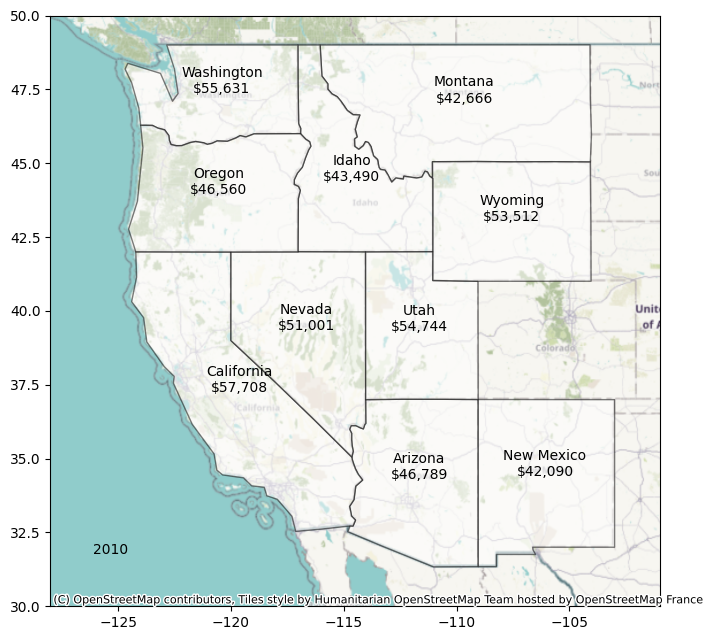

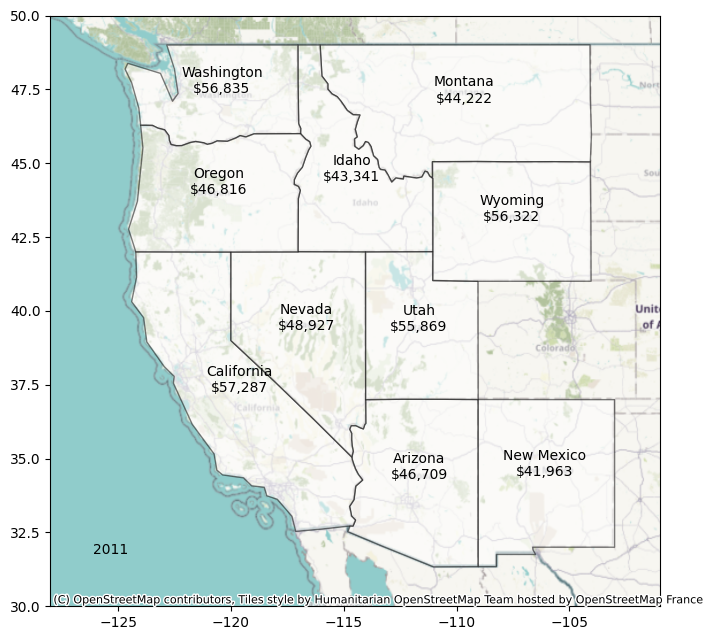

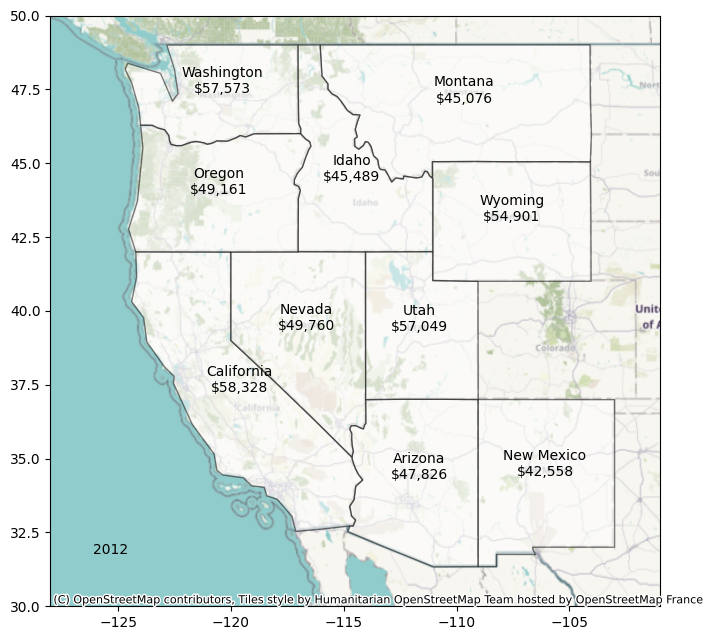

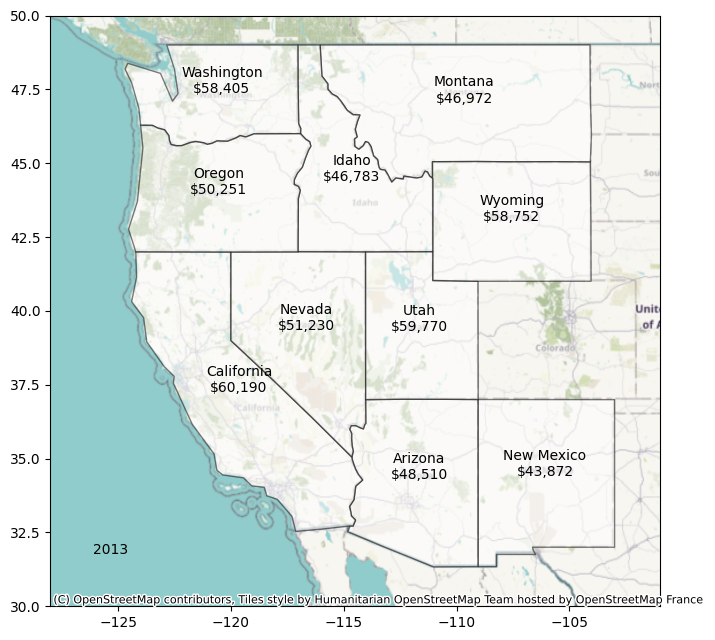

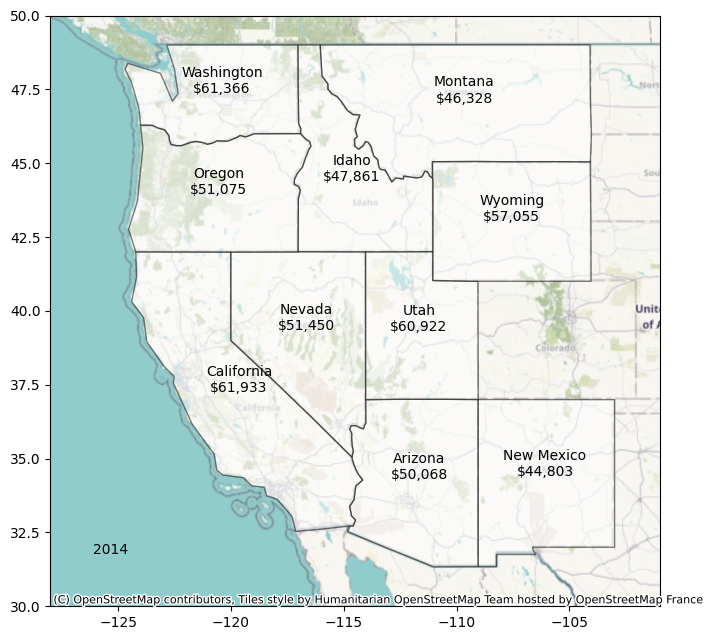

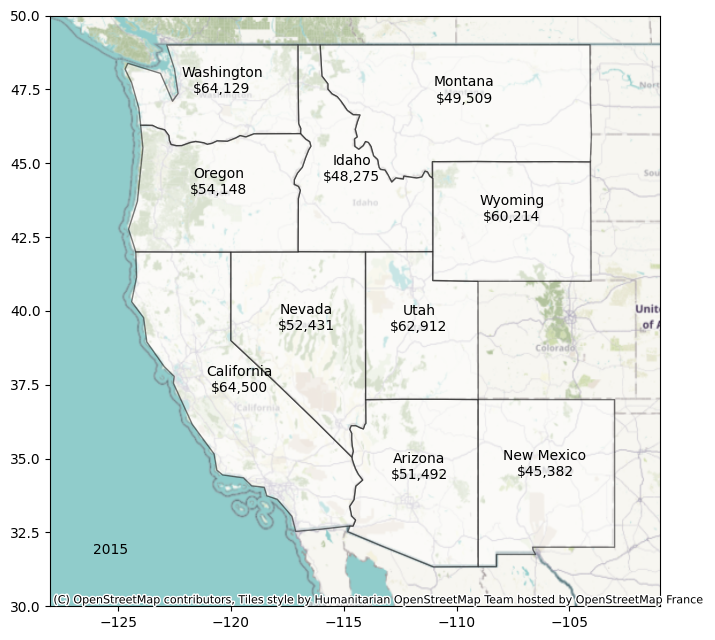

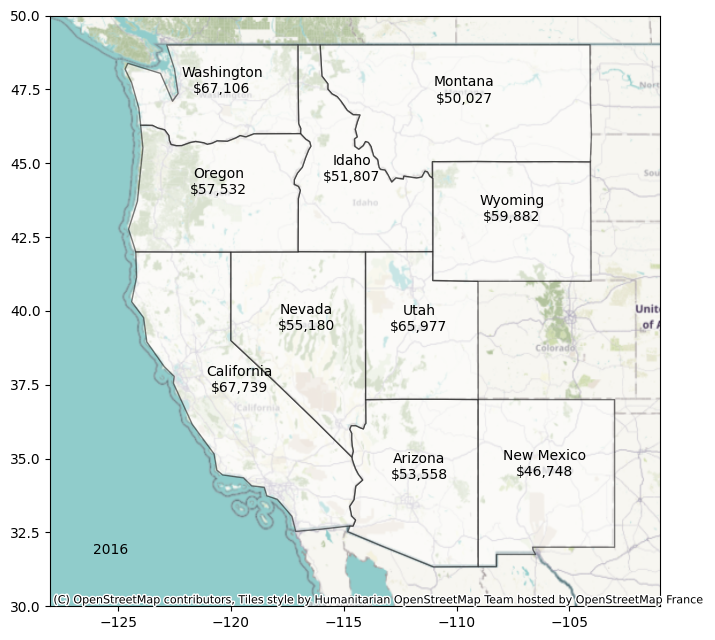

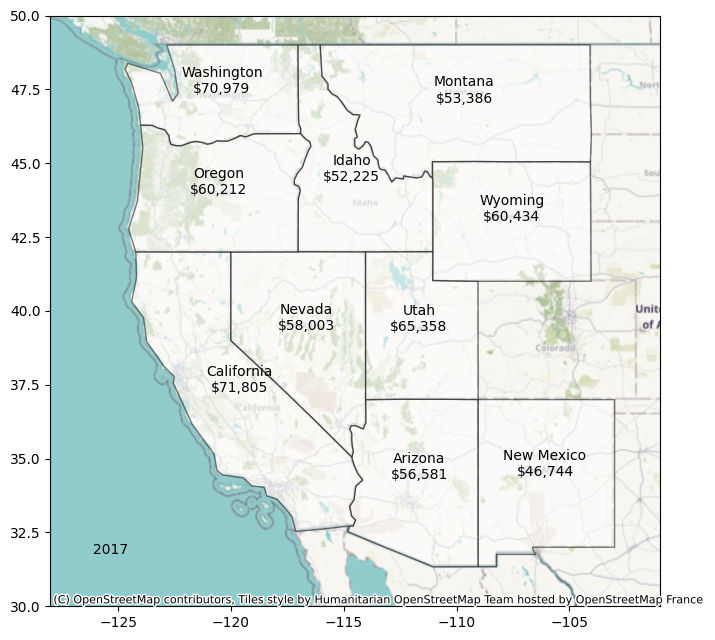

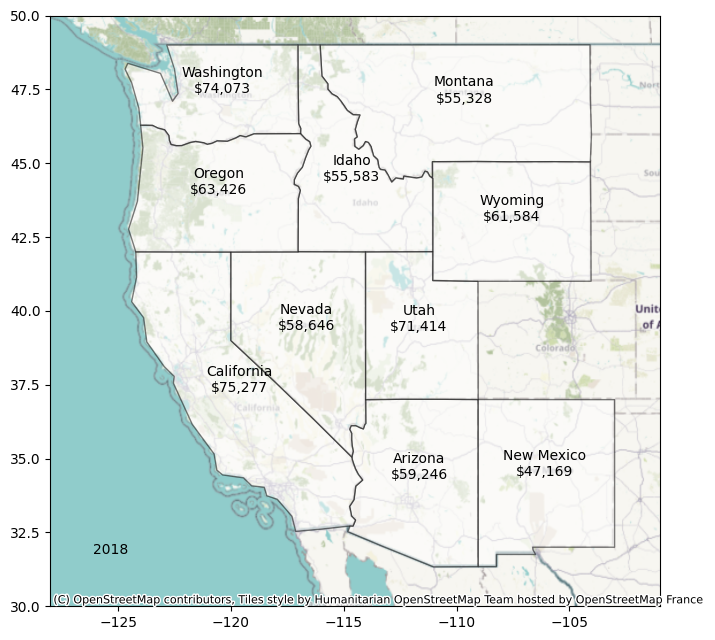

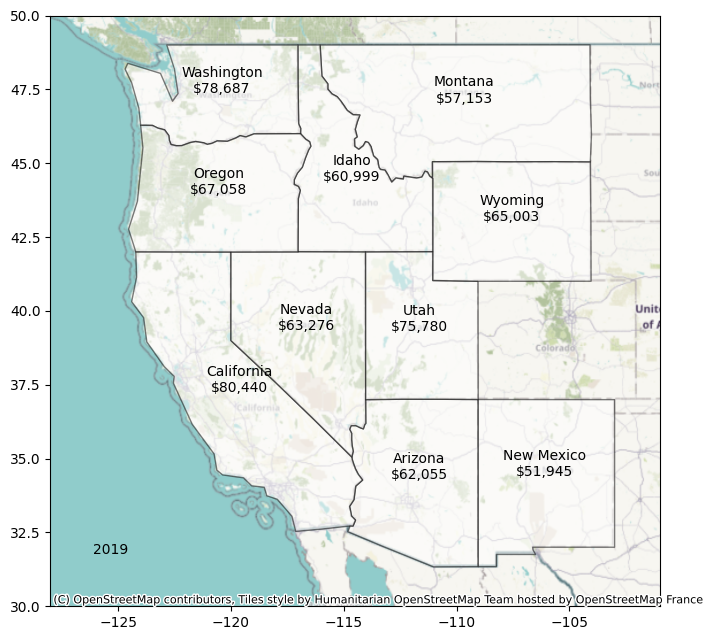

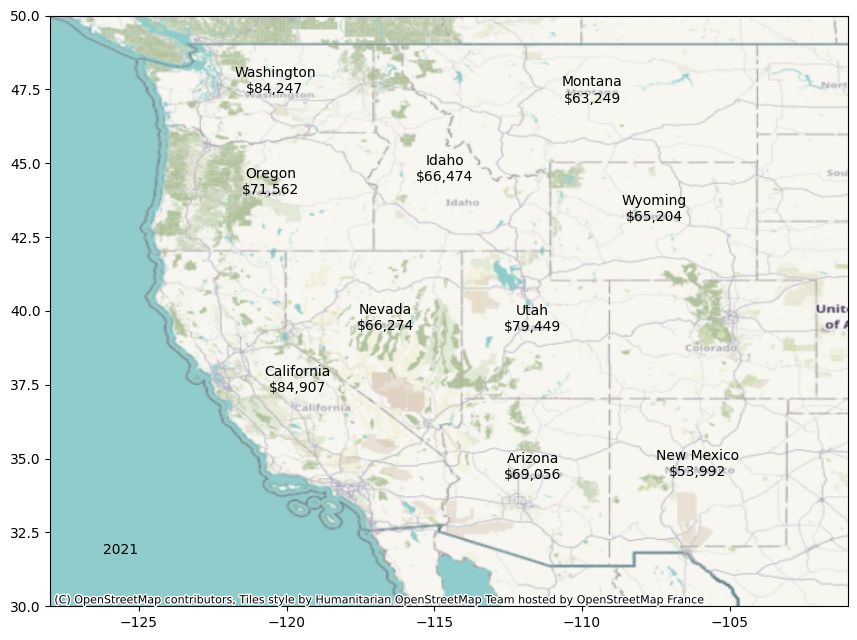

In [0]:
for year,val in zip(y_list, v_list): 
    df_m.plot(column ='name', alpha=0.5, legend=False,
              edgecolor = 'black', color='white', ax=ax)
    
    n = 0.08     #adjust bubble size
    df_centroid = df_m.to_crs('+proj=cea').centroid
    ax = df_centroid.plot(markersize = df_m[val]*n, figsize = (9, 6.5),
                            color = [dict_pal.get(i) for i in df_m[val]],
                            alpha = 0.9)
    ax.set_xlim(-128, -101)
    ax.set_ylim(30, 50)
    
    df_m.apply(lambda x: ax.annotate(text = x['name'] +'\n'+ str(x[year]),
                               xy = x.geometry.centroid.coords[0],
                               ha = 'center'), axis = 1)
    contextily.add_basemap(ax, crs=df_m.crs.to_string())
    
    plt.legend(title=year, frameon=False,
               bbox_to_anchor=(0.05, 0.05), loc='lower left')
    plt.tight_layout()
    plt.savefig('/dbfs/FileStore/images/demos/geo/bubble_'+year+'.png')


After creating the bubble charts, we will combine them to express changes in spatial data.

## 2.1 Creating a photo collage
Use the previously defined function to get a photo collage.


In [0]:
get_collage(3, 4, 900*3, 650*4,
            ['/dbfs/FileStore/images/demos/geo/bubble_'+y+'.png' for y in y_list], '/dbfs/FileStore/images/demos/geo/bubble_collage.png')

0 0 0
1 0 650
2 0 1300
3 0 1950
4 900 0
5 900 650
6 900 1300
7 900 1950
8 1800 0
9 1800 650
10 1800 1300
11 1800 1950


In [0]:
%fs ls /FileStore/images/demos/geo/

path name size modificationTime dbfs:/FileStore/images/demos/geo/bubble.gif bubble.gif 916046 1699366873000 dbfs:/FileStore/images/demos/geo/bubble_2010.png bubble_2010.png 466980 1703782784000 dbfs:/FileStore/images/demos/geo/bubble_2011.png bubble_2011.png 466998 1703782784000 dbfs:/FileStore/images/demos/geo/bubble_2012.png bubble_2012.png 466985 1703782785000 dbfs:/FileStore/images/demos/geo/bubble_2013.png bubble_2013.png 467169 1703782786000 dbfs:/FileStore/images/demos/geo/bubble_2014.png bubble_2014.png 467355 1703782787000 dbfs:/FileStore/images/demos/geo/bubble_2015.png bubble_2015.png 466720 1703782789000 dbfs:/FileStore/images/demos/geo/bubble_2016.png bubble_2016.png 467378 1703782790000 dbfs:/FileStore/images/demos/geo/bubble_2017.png bubble_2017.png 467295 1703782791000 dbfs:/FileStore/images/demos/geo/bubble_2018.png bubble_2018.png 466787 1703782792000 dbfs:/FileStore/images/demos/geo/bubble_2019.png bubble_2019.png 467791 1703782793000 dbfs:/FileStore/images/demos/geo/bubble_2021.png bubble_2021.png 467620 1703782794000 dbfs:/FileStore/images/demos/geo/bubble_collage.png bubble_collage.png 1905125 1703782823000 dbfs:/FileStore/images/demos/geo/choropleth.gif choropleth.gif 629747 1699366223000 dbfs:/FileStore/images/demos/geo/choropleth_collage.png choropleth_collage.png 2290175 1699366044000 dbfs:/FileStore/images/demos/geo/pie_2010.png pie_2010.png 487579 1703782394000 dbfs:/FileStore/images/demos/geo/pie_2011.png pie_2011.png 487579 1703782395000 dbfs:/FileStore/images/demos/geo/pie_2012.png pie_2012.png 487579 1703782397000 dbfs:/FileStore/images/demos/geo/pie_2013.png pie_2013.png 487579 1703782398000 dbfs:/FileStore/images/demos/geo/pie_2014.png pie_2014.png 487579 1703782399000 dbfs:/FileStore/images/demos/geo/pie_2015.png pie_2015.png 487579 1703782401000 dbfs:/FileStore/images/demos/geo/pie_2016.png pie_2016.png 487579 1703782403000 dbfs:/FileStore/images/demos/geo/pie_2017.png pie_2017.png 487579 1703782404000 dbfs:/FileStore/images/demos/geo/pie_2018.png pie_2018.png 487579 1703782405000 dbfs:/FileStore/images/demos/geo/pie_2019.png pie_2019.png 487579 1703782407000 dbfs:/FileStore/images/demos/geo/pie_2021.png pie_2021.png 487579 1703782408000 dbfs:/FileStore/images/demos/geo/pie_collage.png pie_collage.png 1933616 1703782543000


![Bubble collage](files/images/demos/geo/bubble_collage.png)


## 2.2 Creating an animation
Put the charts together to create a moving GIF file.


In [0]:
img = [Image.open('/dbfs/FileStore/images/demos/geo/bubble_'+y+'.png') for y in y_list]
imageio.mimsave('/dbfs/FileStore/images/demos/geo/bubble.gif', img, duration=0.4)


![Animated bubble](files/images/demos/geo/bubble.gif)


Compared with the choropleth maps, besides labeling data and mapping with colors, the circle areas also help compare spatial data values. We can see that the circle sizes are updated over time.



## 3. Showing proportions with Pie charts
If the goal is to compare data values locally, pie charts can be applied to facilitate reading since they are able to show each location's proportion compared with the others.

To make each location's data stand out, the trick is to separate each location's piece from the rest. This will help distinguish the proportion more easily. This can be set at the 'explode' parameter, as shown in the code below.


In [0]:
#extract a color palette to get a color list
pal_state = list(sns.color_palette(palette='RdYlBu',
                                   n_colors=len(df.name)).as_hex())
for year, val in zip(y_list, v_list):
    fig, ax = plt.subplots(figsize=(9.8, 7.5))
    ax.set_xlim(-126, -101)
    ax.set_ylim(30, 50)
    for n, lat, lon in zip(df_m.name, df_m.lat, df_m.lon):        #plot pie chart
        ax_pie = fig.add_axes([0.8-((lon*-1)-105)/(126-101),
                           ((lat-30)/(50-30))-0.1,
                           0.15, 0.15])
        explode = [0.2 if name==n else 0 for name in df_m.name]
        ax_pie.pie(df_m[val], colors = pal_state,
                   explode = explode, shadow=True)
        
    df_m.plot(column ='name', alpha=0.6, legend=False,           
          cmap = 'RdYlBu',
          edgecolor = 'black', ax=ax)
    df_m.apply(lambda x: ax.annotate(text = x['name'],
                               xy = (x.geometry.centroid.coords[0][0]-1,
                                     x.geometry.centroid.coords[0][1]+1),
                               ha = 'center'), axis = 1)
    contextily.add_basemap(ax, crs=df_m.crs.to_string())
    
    plt.legend(title=year, frameon=False,
               bbox_to_anchor=(-5, -2.9), loc='lower left')
    plt.tight_layout()
    plt.savefig('/dbfs/FileStore/images/demos/geo/pie_'+ year +'.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/root/.ipykernel/4575/command-4483247640063397-1110544094:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/root/.ipykernel/4575/command-4483247640063397-1110544094:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/root/.ipykernel/4575/command-4483247640063397-1110544094:27: UserWarning: This figure includes Axes that are not compatible with tight_l

<Figure size 980x750 with 11 Axes>

<Figure size 980x750 with 11 Axes>

<Figure size 980x750 with 11 Axes>

<Figure size 980x750 with 11 Axes>

<Figure size 980x750 with 11 Axes>

<Figure size 980x750 with 11 Axes>

<Figure size 980x750 with 11 Axes>

<Figure size 980x750 with 11 Axes>

<Figure size 980x750 with 11 Axes>

<Figure size 980x750 with 11 Axes>

<Figure size 980x750 with 11 Axes>

<Figure size 980x750 with 11 Axes>

<Figure size 980x750 with 11 Axes>

<Figure size 980x750 with 11 Axes>

<Figure size 980x750 with 11 Axes>

<Figure size 980x750 with 11 Axes>

<Figure size 980x750 with 11 Axes>

<Figure size 980x750 with 11 Axes>

<Figure size 980x750 with 11 Axes>

<Figure size 980x750 with 11 Axes>

In [0]:
%fs ls /FileStore/images/demos/geo/

path name size modificationTime dbfs:/FileStore/images/demos/geo/bubble.gif bubble.gif 916046 1699366873000 dbfs:/FileStore/images/demos/geo/bubble_2010.png bubble_2010.png 462794 1699366567000 dbfs:/FileStore/images/demos/geo/bubble_2011.png bubble_2011.png 463208 1699366568000 dbfs:/FileStore/images/demos/geo/bubble_2012.png bubble_2012.png 462855 1699366569000 dbfs:/FileStore/images/demos/geo/bubble_2013.png bubble_2013.png 462726 1699366570000 dbfs:/FileStore/images/demos/geo/bubble_2014.png bubble_2014.png 463978 1699366571000 dbfs:/FileStore/images/demos/geo/bubble_2015.png bubble_2015.png 462642 1699366572000 dbfs:/FileStore/images/demos/geo/bubble_2016.png bubble_2016.png 463846 1699366574000 dbfs:/FileStore/images/demos/geo/bubble_2017.png bubble_2017.png 463511 1699366575000 dbfs:/FileStore/images/demos/geo/bubble_2018.png bubble_2018.png 462831 1699366576000 dbfs:/FileStore/images/demos/geo/bubble_2019.png bubble_2019.png 464434 1699366577000 dbfs:/FileStore/images/demos/geo/bubble_2021.png bubble_2021.png 463724 1699366578000 dbfs:/FileStore/images/demos/geo/bubble_collage.png bubble_collage.png 1958246 1699366756000 dbfs:/FileStore/images/demos/geo/choropleth.gif choropleth.gif 629747 1699366223000 dbfs:/FileStore/images/demos/geo/choropleth_collage.png choropleth_collage.png 2290175 1699366044000 dbfs:/FileStore/images/demos/geo/pie_2010.png pie_2010.png 487579 1703782394000 dbfs:/FileStore/images/demos/geo/pie_2011.png pie_2011.png 487579 1703782395000 dbfs:/FileStore/images/demos/geo/pie_2012.png pie_2012.png 487579 1703782397000 dbfs:/FileStore/images/demos/geo/pie_2013.png pie_2013.png 487579 1703782398000 dbfs:/FileStore/images/demos/geo/pie_2014.png pie_2014.png 487579 1703782399000 dbfs:/FileStore/images/demos/geo/pie_2015.png pie_2015.png 487579 1703782401000 dbfs:/FileStore/images/demos/geo/pie_2016.png pie_2016.png 487579 1703782403000 dbfs:/FileStore/images/demos/geo/pie_2017.png pie_2017.png 487579 1703782404000 dbfs:/FileStore/images/demos/geo/pie_2018.png pie_2018.png 487579 1703782405000 dbfs:/FileStore/images/demos/geo/pie_2019.png pie_2019.png 487579 1703782407000 dbfs:/FileStore/images/demos/geo/pie_2021.png pie_2021.png 487579 1703782408000 dbfs:/FileStore/images/demos/geo/pie_collage.png pie_collage.png 1887667 1699367743000


### Creating a photo collage
Let's combine the results.

In [0]:
get_collage(3, 4, 980*3, 750*4,
            ['/dbfs/FileStore/images/demos/geo/pie_'+ y +'.png' for y in y_list],
            '/dbfs/FileStore/images/demos/geo/pie_collage.png')

0 0 0
1 0 750
2 0 1500
3 0 2250
4 980 0
5 980 750
6 980 1500
7 980 2250
8 1960 0
9 1960 750
10 1960 1500
11 1960 2250



![Pie collage](files/images/demos/geo/pie_collage.png)


Creating an animation can also be conducted using the previously mentioned method, as shown with the choropleth maps and bubble charts.


## 4. Making things simple with Bar charts
So far, the techniques previously mentioned are all combining multiple charts. They need to be put together as a photo collage or an animation. This can be a limit when a simple single chart is preferred.

No problem!!

A simple single chart will do as well. Everything can be plotted in just one graph by applying the bar charts. The main concept is each location has its own bar chart in which each bar represents the value of each year. The color mapping will be applied to help compare the bar values.

This method can be an alternative option to choropleth maps and bubble charts in this article.


In [0]:
#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='RdYlBu_r', n_colors=90000-40000).as_hex())
dict_pal = dict(zip(list(range(40000,90000)),pal))

fig, ax = plt.subplots(figsize=(10,8))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlim(-126, -102)
ax.set_ylim(30, 50)

for n, lat, lon in zip(df_m.name, df_m.lat, df_m.lon):
    df_n = df_m[df_m['name']==n][v_list].T
    val = df_n.iloc[:,0].tolist()
    ax_bar = fig.add_axes([0.8-((lon*-1)-105)/(126-102),
                           ((lat-30)/(50-30))-0.08,
                           0.15, 0.08])
    ax_bar.bar(v_list, val, color=[dict_pal.get(i) for i in val])
    ax_bar.axes.get_xaxis().set_visible(False)
    ax_bar.set_ylim(40000, 90000)
    ax_bar.patch.set_alpha(0)
    ax_bar.spines[['right', 'top']].set_visible(False)
    ax_bar.tick_params(axis='both', labelsize=10)
    
df_m.plot(column ='name', alpha=0.6, legend=False,
          cmap = 'RdYlBu_r',
          edgecolor = 'black', ax=ax)
df_m.apply(lambda x: ax.annotate(text = x['name'],
                               xy = x.geometry.centroid.coords[0],
                               ha = 'center'), axis = 1)    
ax = contextily.add_basemap(ax, crs=df_m.crs.to_string())
plt.show()

<Figure size 1000x800 with 12 Axes>


## 5. Handling time-series data with Line charts
In fact, the annual data that we have is time-series data. We can apply multiple line charts to express changes over time. Silhouettes of other locations' data can be shown locally to facilitate reading and help compare the values.

This method can be an alternative option to pie charts in this article since it helps focus on each location's data while being able to compare with the rest.

In [0]:
#create a list of value for using as silhouette
val_df = [df_m[df_m['name']==n][v_list].T for n in df_m.name]
val_list = [i.iloc[:,0].tolist() for i in val_df]

fig, ax = plt.subplots(figsize=(10,8))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlim(-126, -102)
ax.set_ylim(30, 50)

for n, lat, lon in zip(df_m.name, df_m.lat, df_m.lon):
    df_n = df_m[df_m['name']==n][v_list].T
    val = df_n.iloc[:,0].tolist()
    ax_line = fig.add_axes([0.8-((lon*-1)-105)/(126-102),
                           ((lat-30)/(50-30))-0.06,
                           0.15, 0.06])
    for other_v in val_list:
        ax_line.plot(other_v, color='gray', alpha = 0.4)
    ax_line.plot(val, color='red')
    ax_line.set_ylim(40000, 90000)
    ax_line.axes.get_xaxis().set_visible(False)
    ax_line.patch.set_alpha(0)
    ax_line.spines[['right', 'top']].set_visible(False)
    ax_line.tick_params(axis='both', labelsize=10)
    
df_m.plot(column ='name', alpha=0.6, legend=False,
          cmap = 'RdYlBu_r',
          edgecolor = 'black', ax=ax)
df_m.apply(lambda x: ax.annotate(text = x['name'],
                               xy = x.geometry.centroid.coords[0],
                               ha = 'center'), axis = 1)    
ax = contextily.add_basemap(ax, crs=df_m.crs.to_string())
plt.show()

<Figure size 1000x800 with 12 Axes>


# Summary
Firstly, let's wrap up every chart mentioned in this article.
* Choropleth maps
* Bubble charts
* Pie charts
* Bar charts
* Line charts

If we take a close look at these charts, most are just common graphs with nothing sophisticated. The main idea is to apply their simplicity to show complicated scenarios: simultaneous data value changes in multiple locations over time.

> “Out of clutter, find simplicity” — Albert Einstein

Lastly, I'm pretty sure there can be other graphs for this kind of data. The main purpose of this article is to guide with ideas, and the charts explained here are just examples.

If you want to share or have any suggestions, please feel free to leave a comment.

Thanks for reading.

Here are some of my data visualization articles that you may find interesting:


* [7 Visualizations with Python to Handle Multivariate Categorical Data](https://medium.com/towards-data-science/7-visualizations-with-python-to-handle-multivariate-categorical-data-63158db0911d)
* [8 Visualizations with Python to Handle Multiple Time-Series Data](https://towardsdatascience.com/8-visualizations-with-python-to-handle-multiple-time-series-data-19b5b2e66dd0)
* [7 Visualizations with Python to Express changes in Rank over time](https://towardsdatascience.com/7-visualizations-with-python-to-express-changes-in-rank-over-time-71c1f11d7e4b)
* [9 Visualizations with Python to show Proportions or Percentages instead of a Pie chart](https://towardsdatascience.com/9-visualizations-to-show-proportions-or-percentages-instead-of-a-pie-chart-4e8d81617451)
* [9 Visualizations with Python that Catch More Attention than a Bar Chart](https://towardsdatascience.com/9-visualizations-that-catch-more-attention-than-a-bar-chart-72d3aeb2e091)